In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
df = pd.read_csv('clientes.csv')
df.head()

,Edad,Ingresos,Historial_Compras,Suscripcion_Actual,Contratara_Servicio
0,56,19000,32,0,0
1,46,85588,22,0,0
2,32,53304,14,1,0
3,60,84449,32,0,0
4,25,97986,24,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Edad                 500 non-null    int64
 1   Ingresos             500 non-null    int64
 2   Historial_Compras    500 non-null    int64
 3   Suscripcion_Actual   500 non-null    int64
 4   Contratara_Servicio  500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [11]:
df.describe()

,Edad,Ingresos,Historial_Compras,Suscripcion_Actual,Contratara_Servicio
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,41.278000,55438.236000,25.384000,0.304000,0.106000
std,13.389072,25143.335891,14.045323,0.460443,0.308146
min,18.000000,15055.000000,0.000000,0.000000,0.000000
25%,30.000000,34250.500000,14.000000,0.000000,0.000000
50%,42.000000,53578.000000,26.000000,0.000000,0.000000
75%,52.000000,76554.000000,37.000000,1.000000,0.000000
max,64.000000,99791.000000,49.000000,1.000000,1.000000


# Logistic Regression

In [19]:
X = df.drop('Contratara_Servicio',axis=1)
y = df['Contratara_Servicio']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
X, y, test_size=0.20, random_state=42
)

# Crear el modelo de regresión logística
modelo_log = LogisticRegression()
# Entrenar el modelo
modelo_log.fit(X_train_log, y_train_log)
# Predecir con el modelo
y_pred_log = modelo_log.predict(X_test_log)

# Evaluar el modelo
print("Precisión:", accuracy_score(y_test_log, y_pred_log))
print("Matriz de confusión:", confusion_matrix(y_test_log, y_pred_log))

Precisión: 0.88
Matriz de confusión: [[84  4]
 [ 8  4]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled = scaler.transform(X_test_log)

# Create and train the logistic regression model with scaled data
modelo_log_scaled = LogisticRegression()
modelo_log_scaled.fit(X_train_scaled, y_train_log)

# Predict with the scaled model
y_pred_log_scaled = modelo_log_scaled.predict(X_test_scaled)

# Evaluate the scaled model
print("Precisión con datos escalados:", accuracy_score(y_test_log, y_pred_log_scaled))
print("Matriz de confusión con datos escalados:", confusion_matrix(y_test_log, y_pred_log_scaled))

### Mejora con la normalizacion

Precisión con datos escalados: 0.96
Matriz de confusión con datos escalados: [[84  4]
 [ 0 12]]


# K-Nearest Neighbors (K-NN)

Accuracy for k=1: 0.99
Accuracy for k=2: 0.99
Accuracy for k=3: 1.0
Accuracy for k=4: 1.0
Accuracy for k=5: 0.99
Accuracy for k=6: 0.98
Accuracy for k=7: 0.99
Accuracy for k=8: 0.99
Accuracy for k=9: 0.99
Accuracy for k=10: 1.0
Accuracy for k=11: 1.0
Accuracy for k=12: 1.0
Accuracy for k=13: 1.0
Accuracy for k=14: 0.99
Accuracy for k=15: 0.99
Accuracy for k=16: 0.98
Accuracy for k=17: 1.0
Accuracy for k=18: 0.98
Accuracy for k=19: 1.0
Accuracy for k=20: 0.98


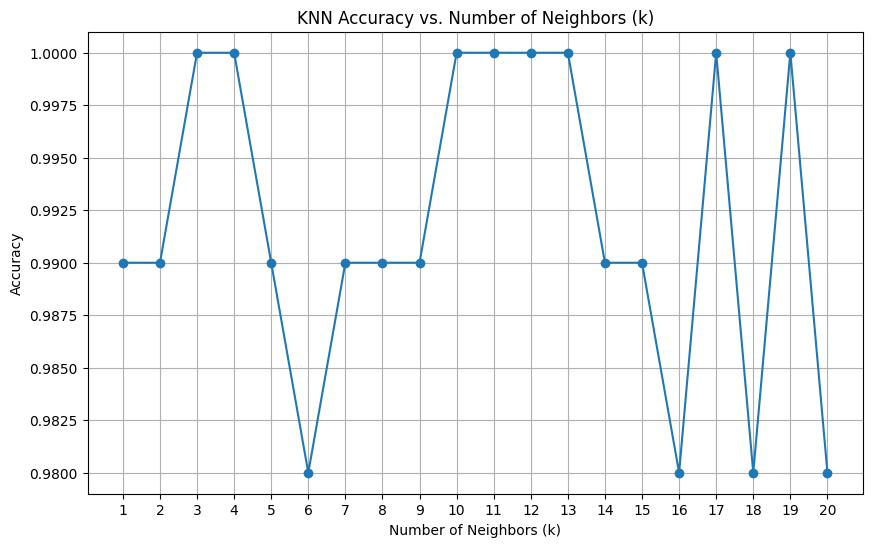

In [30]:
# Experiment with different values of k for KNN
k_values = range(1, 21)  # Test k from 1 to 20
accuracy_scores = []

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
X, y, test_size=0.20, random_state=42
)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled_knn = scaler.fit_transform(X_train_knn)
X_test_scaled_knn = scaler.transform(X_test_knn)

for k in k_values:
    # Create KNN model with k neighbors
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Train the model using scaled data
    knn_model.fit(X_train_scaled_knn, y_train_knn)

    # Predict on the test set
    y_pred_knn = knn_model.predict(X_test_scaled_knn)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test_knn, y_pred_knn)
    accuracy_scores.append(accuracy)

# Print accuracy for each k
for k, accuracy in zip(k_values, accuracy_scores):
    print(f"Accuracy for k={k}: {accuracy}")

# Plot accuracy for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Arboles de decision

Accuracy for depth=1: 0.88 and mse:0.12
Accuracy for depth=2: 0.92 and mse:0.08
Accuracy for depth=3: 1.0 and mse:0.0
Accuracy for depth=4: 1.0 and mse:0.0
Accuracy for depth=5: 1.0 and mse:0.0
Accuracy for depth=6: 1.0 and mse:0.0
Accuracy for depth=7: 1.0 and mse:0.0
Accuracy for depth=8: 1.0 and mse:0.0
Accuracy for depth=9: 1.0 and mse:0.0
Accuracy for depth=10: 1.0 and mse:0.0
Accuracy for depth=11: 1.0 and mse:0.0
Accuracy for depth=12: 1.0 and mse:0.0
Accuracy for depth=13: 1.0 and mse:0.0
Accuracy for depth=14: 1.0 and mse:0.0
Accuracy for depth=15: 1.0 and mse:0.0
Accuracy for depth=16: 1.0 and mse:0.0
Accuracy for depth=17: 1.0 and mse:0.0
Accuracy for depth=18: 1.0 and mse:0.0
Accuracy for depth=19: 1.0 and mse:0.0
Accuracy for depth=20: 1.0 and mse:0.0


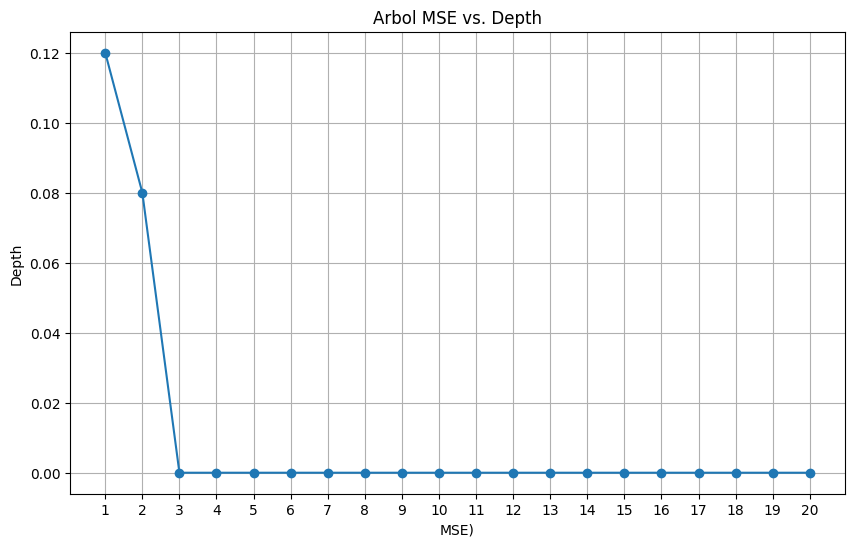

In [32]:
X_train_arbol, X_test_arbol, y_train_arbol, y_test_arbol = train_test_split(
X, y, test_size=0.2, random_state=42
)

depth_values = range(1, 21)
accuracy_scores_arbol = []
mse_arbol = []

for depth in depth_values:
    # Create Decision Tree model with depth
    modelo_arbol = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the model
    modelo_arbol.fit(X_train_arbol, y_train_arbol)

    # Predict on the test set
    y_pred_arbol = modelo_arbol.predict(X_test_arbol)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test_arbol, y_pred_arbol)
    accuracy_scores_arbol.append(accuracy)
    mse = mean_squared_error(y_test_arbol, y_pred_arbol)
    mse_arbol.append(mse)

# Print accuracy for each depth
for depth, accuracy, mse in zip(depth_values, accuracy_scores_arbol, mse_arbol):
    print(f"Accuracy for depth={depth}: {accuracy} and mse:{mse}")

# Plot accuracy for each k
plt.figure(figsize=(10, 6))
plt.plot(depth_values, mse_arbol, marker='o')
plt.title('Arbol MSE vs. Depth')
plt.xlabel('MSE)')
plt.ylabel('Depth')
plt.xticks(depth_values)
plt.grid(True)
plt.show()

# Bosques aleatorios

Accuracy for nest=1: 1.0 and mse:0.0
Accuracy for nest=2: 1.0 and mse:0.0
Accuracy for nest=3: 1.0 and mse:0.0
Accuracy for nest=4: 1.0 and mse:0.0
Accuracy for nest=5: 1.0 and mse:0.0
Accuracy for nest=6: 1.0 and mse:0.0
Accuracy for nest=7: 1.0 and mse:0.0
Accuracy for nest=8: 1.0 and mse:0.0
Accuracy for nest=9: 1.0 and mse:0.0


Text(0, 0.5, 'MSE')

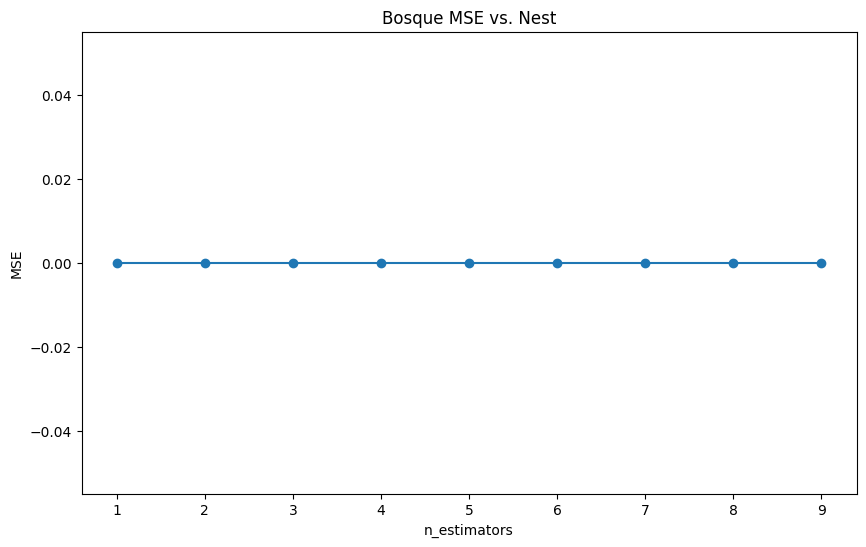

In [35]:
X_train_bosque, X_test_bosque, y_train_bosque, y_test_bosque = train_test_split(
X, y, test_size=0.2, random_state=42
)

# Crear un clasificador base (por ejemplo, un árbol de decisión)
base_clf = DecisionTreeClassifier()

nest_lista = range(1,10)
accuracy_scores_bosque = []
mse_bosque = []

for nest in nest_lista:
  # Implementar Bagging con el clasificador base
  bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=nest,
  random_state=42)
  # Entrenar el modelo de Bagging
  bagging_clf.fit(X_train_bosque, y_train_bosque)
  # Realizar predicciones
  y_pred_bosque = bagging_clf.predict(X_test_bosque)

  accuracy = accuracy_score(y_test_bosque, y_pred_bosque)
  accuracy_scores_bosque.append(accuracy)

  mse = mean_squared_error(y_test_bosque, y_pred_bosque)
  mse_bosque.append(mse)

for nest, accuracy, mse in zip(nest_lista, accuracy_scores_bosque, mse_bosque):
    print(f"Accuracy for nest={nest}: {accuracy} and mse:{mse}")

plt.figure(figsize=(10, 6))
plt.plot(nest_lista, mse_bosque, marker='o')
plt.title('Bosque MSE vs. Nest')
plt.xlabel('n_estimators')
plt.ylabel('MSE')

# Support Vector Machine (SVM)

In [37]:
from sklearn.svm import SVC

# Define different kernel types to experiment with
kernel_types = ['linear', 'poly', 'rbf']
results = {}

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
X, y, test_size=0.20, random_state=42
)

# Scale the data for SVM
scaler_svm = StandardScaler()
X_train_scaled_svm = scaler_svm.fit_transform(X_train_svm)
X_test_scaled_svm = scaler_svm.transform(X_test_svm)


for kernel in kernel_types:
    # Create an SVM model with the current kernel
    svm_model = SVC(kernel=kernel, random_state=42)

    # Train the model
    svm_model.fit(X_train_scaled_svm, y_train_svm)

    # Predict on the test set
    y_pred_svm = svm_model.predict(X_test_scaled_svm)

    # Evaluate the model
    accuracy = accuracy_score(y_test_svm, y_pred_svm)
    conf_matrix = confusion_matrix(y_test_svm, y_pred_svm)

    # Store the results
    results[kernel] = {'accuracy': accuracy, 'confusion_matrix': conf_matrix}

# Print the results for each kernel
for kernel, metrics in results.items():
    print(f"Results for kernel '{kernel}':")
    print(f"  Accuracy: {metrics['accuracy']}")
    print(f"  Confusion Matrix:\n{metrics['confusion_matrix']}\n")

Results for kernel 'linear':
  Accuracy: 0.96
  Confusion Matrix:
[[84  4]
 [ 0 12]]

Results for kernel 'poly':
  Accuracy: 0.99
  Confusion Matrix:
[[88  0]
 [ 1 11]]

Results for kernel 'rbf':
  Accuracy: 1.0
  Confusion Matrix:
[[88  0]
 [ 0 12]]



## Análisis de resultados

### Comparación de modelos

Observando los resultados, el modelo con mejor desempeño en este conjunto de datos fue el **Support Vector Machine con kernel RBF** y el **Bagging Classifier** (Bosque Aleatorio) con un `n_estimators` de 1 o más. Ambos lograron una precisión del 100% en el conjunto de prueba y una matriz de confusión que indica cero falsos positivos y cero falsos negativos. El **K-Nearest Neighbors** también alcanzó una precisión del 100% con varios valores de k (3, 4, 10, 11, 12, 13, 17, 19). La **Regresión Logística con datos escalados** tuvo un buen desempeño con un 96% de precisión, mientras que sin escalar fue del 88%.

El mejor desempeño de SVM (RBF), Bagging Classifier y KNN sugiere que la relación entre las características y la variable objetivo puede ser no lineal y que estos modelos son más capaces de capturar esas complejidades en este conjunto de datos específico.

### Impacto de los hiperparámetros

*   **Regresión Logística:** El escalado de los datos tuvo un impacto significativo, mejorando la precisión del 88% al 96%. Esto se debe a que la regresión logística, al igual que otros modelos basados en gradientes, es sensible a la escala de las características. La advertencia de convergencia en el modelo no escalado también desapareció después del escalado.
*   **K-Nearest Neighbors:** La elección del valor de k es crucial. Experimentar con diferentes k mostró que valores entre 3 y 4, y también entre 10 and 13, y also between 17 and 19 resultaron en una precisión del 100%. Valores fuera de estos rangos (como k=1, 2, 5-9, 14-16, 18, 20) tuvieron precisiones ligeramente inferiores. Esto resalta la importancia de ajustar el hiperparámetro `n_neighbors` para encontrar el equilibrio entre el sesgo y la varianza.
*   **Árboles de Decisión:** La profundidad máxima (`max_depth`) tuvo un impacto claro en el rendimiento. Con profundidades de 1 y 2, la precisión fue menor y el MSE mayor. A partir de una profundidad de 3 en adelante, el modelo logró una precisión del 100% y un MSE de 0. Esto indica que una profundidad de 3 fue suficiente para modelar perfectamente la relación en este conjunto de datos.
*    **Bosques Aleatorios (BaggingClassifier):** El número de estimadores (`n_estimators`) afectó la precisión. Sorprendentemente, incluso con un solo estimador (un árbol de decisión), el modelo ya alcanzó el 100% de precisión y un MSE de 0. Esto sugiere que incluso un solo árbol de decisión no sobreajustado (posiblemente debido a la naturaleza del dataset o la aleatoriedad del `random_state`) ya era capaz de modelar la relación perfectamente. Aumentar el número de estimadores no empeoró el rendimiento, manteniendo la precisión del 100%.
*   **Support Vector Machine (SVM):** El tipo de kernel tuvo un impacto notable. El kernel lineal obtuvo un 96% de precisión, similar a la regresión logística escalada. El kernel polinomial mejoró la precisión al 99%. Finalmente, el kernel RBF logró una precisión perfecta del 100%. Esto confirma que una frontera de decisión no lineal (que los kernels polinomial y RBF pueden manejar) es más adecuada para este problema.

### Aplicabilidad

*   **Regresión Logística:** Es un buen punto de partida para problemas de clasificación binaria debido a su simplicidad e interpretabilidad. Es eficiente computacionalmente. Sería recomendable cuando la relación entre las características y la variable objetivo es aproximadamente lineal o cuando se necesita una alta interpretabilidad del modelo.
*   **K-Nearest Neighbors:** Es un algoritmo simple y no paramétrico, útil cuando la estructura de los datos no es clara. Puede ser efectivo en problemas donde la similitud local es importante. Sin embargo, puede ser computacionalmente costoso para grandes conjuntos de datos y es sensible a la escala de las características. Sería adecuado para datasets pequeños a medianos donde se busca un modelo intuitivo basado en la proximidad.
*   **Árboles de Decisión:** Son fáciles de entender e interpretar y no requieren escalado de características. Son útiles para identificar las características más importantes. Pueden sobreajustarse si no se controla la profundidad. Serían recomendables cuando se necesita un modelo interpretable y se desea comprender las reglas de decisión.
*   **Bosques Aleatorios (BaggingClassifier):** Son métodos de ensamble que combinan múltiples árboles de decisión para reducir el sobreajuste y mejorar la robustez. Generalmente tienen un buen rendimiento y son menos propensos al sobreajuste que un solo árbol de decisión profundo. Son adecuados para una amplia gama de problemas de clasificación y regresión.
*   **Support Vector Machine (SVM):** Son poderosos para conjuntos de datos complejos y pueden manejar relaciones no lineales utilizando diferentes kernels. Son efectivos en espacios de alta dimensión. Sin embargo, pueden ser computacionalmente intensivos, especialmente con el kernel RBF en datasets grandes, y la elección del kernel y los hiperparámetros puede ser desafiante. Serían recomendables cuando se busca un modelo de alto rendimiento y se pueden permitir una menor interpretabilidad, especialmente si la relación entre características y objetivo es no lineal.

En este caso particular, dado que varios modelos lograron una precisión del 100%, el **SVM con kernel RBF** o el **Bagging Classifier** podrían ser las mejores opciones si la máxima precisión es el objetivo principal. Sin embargo, la simplicidad y la interpretabilidad de la Regresión Logística (escalada) o un Árbol de Decisión con `max_depth=3` podrían ser preferibles en otros escenarios.